In [1]:
import os
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
os.environ['PYTHONHASHSEED'] = '0'

In [2]:
x = np.linspace(0, 10)

In [4]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
set_seeds()

In [5]:
y = x + np.random.standard_normal(len(x))

In [6]:
reg = np.polyfit(x, y, deg = 1)

In [7]:
reg

array([0.94612934, 0.22855261])

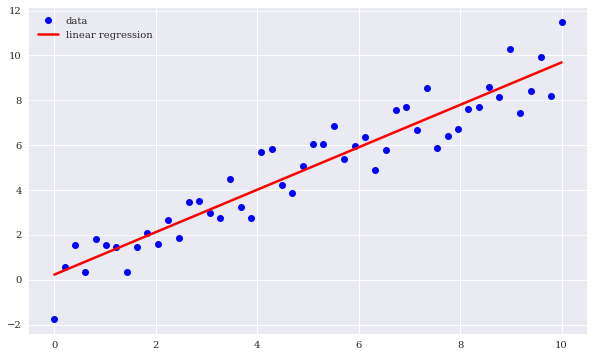

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data')
plt.plot(x, np.polyval(reg, x), 'r', lw=2.5,
label='linear regression')
plt.legend(loc=0);

In [9]:
import pandas as pd

In [10]:
fn = '/media/sf_p4t_docs/pyalgo/dados/ITUB4_daily.csv'

In [11]:
%%time
data = pd.read_csv(fn, index_col=['datetime'], parse_dates=True)

CPU times: user 14.8 ms, sys: 504 µs, total: 15.3 ms
Wall time: 18.1 ms


In [12]:
data = pd.DataFrame(data['close'])

In [13]:
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['close'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)

In [14]:
reg = np.linalg.lstsq(data[cols], data['close'], rcond=None)[0]

In [15]:
reg

array([ 0.93455838,  0.05656462, -0.02041839, -0.01785453,  0.04715069])

In [16]:
data['prediction'] = np.dot(data[cols], reg)

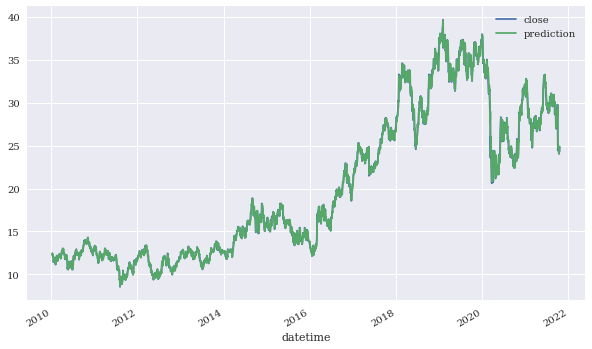

In [17]:
data[['close', 'prediction']].plot(figsize=(10, 6));

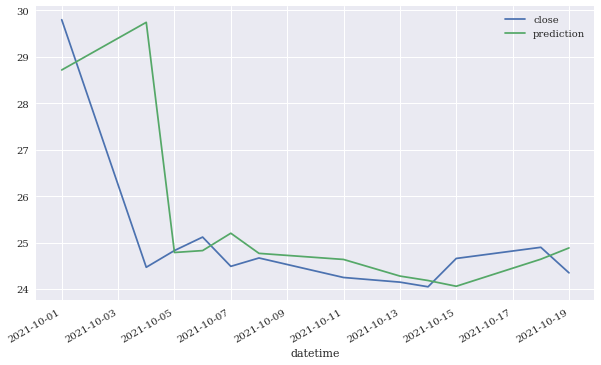

In [21]:
data[['close', 'prediction']].loc['2021-10-1':].plot(
figsize=(10, 6));

In [22]:
data['return'] = np.log(data['close'] / data['close'].shift(1))

In [23]:
data.dropna(inplace=True)

In [25]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['return'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)

In [26]:
reg = np.linalg.lstsq(data[cols], data['return'],rcond=None)[0]

In [27]:
reg

array([-0.06245886,  0.00871773, -0.03687384, -0.0408564 ,  0.0064765 ])

In [29]:
data['prediction'] = np.dot(data[cols], reg)

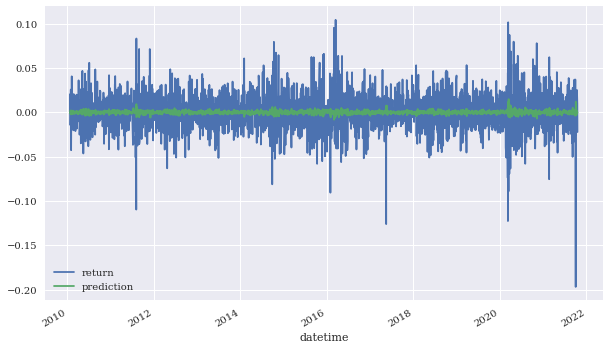

In [30]:
data[['return', 'prediction']].iloc[lags:].plot(figsize=(10, 6));

In [31]:
hits = np.sign(data['return'] *
              data['prediction']).value_counts()

In [32]:
hits

 1.0    1477
-1.0    1382
 0.0      49
dtype: int64

In [33]:
hits.values[0] / sum(hits)

0.5079092159559835

In [34]:
reg = np.linalg.lstsq(data[cols], np.sign(data['return']), rcond=None)[0]

In [35]:
reg

array([-2.67855189, -0.05346365, -1.2389203 , -1.22720993,  0.46413115])

In [36]:
data['prediction'] = np.sign(np.dot(data[cols], reg))

In [37]:
data['prediction'].value_counts()

-1.0    1480
 1.0    1428
Name: prediction, dtype: int64

In [38]:
hits = np.sign(data['return'] *
              data['prediction']).value_counts()

In [39]:
hits

 1.0    1482
-1.0    1377
 0.0      49
dtype: int64

In [40]:
hits.values[0] / sum(hits)

0.5096286107290234

In [41]:
data.head()

,close,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
datetime,,,,,,,,
2010-01-19,12.04,0.009125,-0.018985,-0.009764,0.008130,-0.008130,-1.0,-0.005797
2010-01-20,11.77,-0.005797,0.009125,-0.018985,-0.009764,0.008130,1.0,-0.022681
2010-01-21,11.41,-0.022681,-0.005797,0.009125,-0.018985,-0.009764,1.0,-0.031064
2010-01-22,11.50,-0.031064,-0.022681,-0.005797,0.009125,-0.018985,1.0,0.007857
2010-01-26,11.52,0.007857,-0.031064,-0.022681,-0.005797,0.009125,1.0,0.001738


In [42]:
data['strategy'] = data['prediction'] * data['return']

In [43]:
data[['return', 'strategy']].sum().apply(np.exp)

return      2.010735
strategy    5.658952
dtype: float64

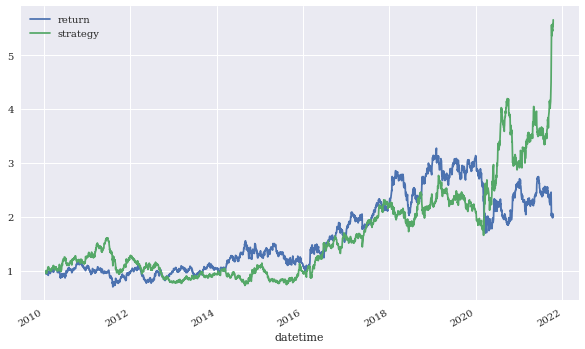

In [44]:
data[['return', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

Deep Learning Approach

In [45]:
data = pd.DataFrame(data['close'])
data['return'] = np.log(data['close'] / 
                        data['close'].shift(1))
data['direction'] = np.where(data['return'] > 0, 1, 0)
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['close'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)

In [46]:
data.round(4).tail()

,close,return,direction,lag_1,lag_2,lag_3,lag_4,lag_5
datetime,,,,,,,,
2021-10-13,24.15,-0.0041,0,24.25,24.67,24.49,25.12,24.83
2021-10-14,24.05,-0.0041,0,24.15,24.25,24.67,24.49,25.12
2021-10-15,24.66,0.0250,1,24.05,24.15,24.25,24.67,24.49
2021-10-18,24.90,0.0097,1,24.66,24.05,24.15,24.25,24.67
2021-10-19,24.35,-0.0223,0,24.90,24.66,24.05,24.15,24.25


In [48]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop

In [53]:
optimizer = Adam(learning_rate = 0.0001)

In [51]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(100)

In [55]:
set_seeds()
model = Sequential()
model.add(Dense(64, activation='relu',
               input_shape=(lags,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizer,
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [71]:
cutoff = '2020-12-31'

In [72]:
training_data = data[data.index < cutoff].copy()

In [73]:
mu, std = training_data.mean(), training_data.std()

In [74]:
training_data_ = (training_data - mu) / std

In [75]:
test_data = data[data.index >= cutoff].copy()

In [76]:
test_data_ = (test_data - mu) / std

In [77]:
%%time
model.fit(training_data[cols],
         training_data['direction'],
         epochs=200, verbose=False,
         validation_split=0.2, shuffle=False)

Epoch 1/200
68/68 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.5079 - val_loss: 0.6924 - val_accuracy: 0.5176
Epoch 2/200
68/68 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5092 - val_loss: 0.6925 - val_accuracy: 0.5083
Epoch 3/200
68/68 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5116 - val_loss: 0.6927 - val_accuracy: 0.4991
Epoch 4/200
68/68 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5129 - val_loss: 0.6927 - val_accuracy: 0.5046
Epoch 5/200
68/68 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5106 - val_loss: 0.6929 - val_accuracy: 0.5083
Epoch 6/200
68/68 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5120 - val_loss: 0.6929 - val_accuracy: 0.5083
Epoch 7/200
68/68 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5134 - val_loss: 0.6930 - val_accuracy: 0.5157
Epoch 8/200
6

In [78]:
res = pd.DataFrame(model.history.history)

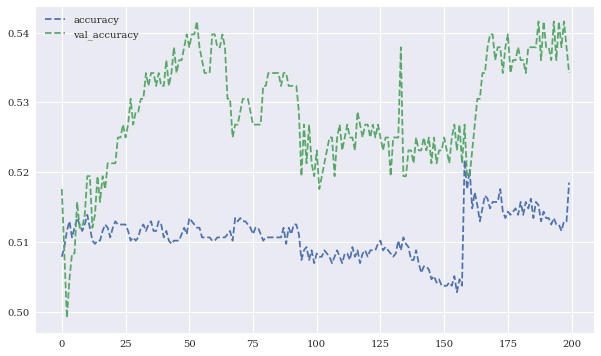

In [79]:
res[['accuracy', 'val_accuracy']].plot(figsize=(10, 6), style='--');

In [80]:
model.evaluate(training_data_[cols], training_data['direction'])

85/85 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.5013


[0.6969810128211975, 0.5012938976287842]

In [81]:
pred = np.where(model.predict(training_data_[cols]) > 0.5, 1, 0)

In [82]:
pred[:30].flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [84]:
training_data['prediction'] = np.where(pred > 0, 1, -1)

In [85]:
training_data['strategy'] = (training_data['prediction'] * 
                             training_data['return'])

In [86]:
training_data[['return', 'strategy']].sum().apply(np.exp)

return      2.745660
strategy    0.596392
dtype: float64

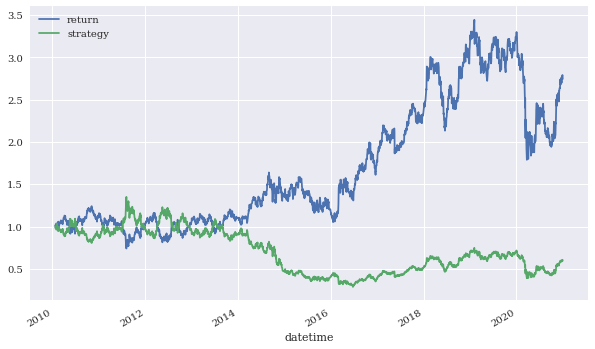

In [87]:
training_data[['return', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [88]:
model.evaluate(test_data_[cols], test_data['direction'])

7/7 [==============================] - 0s 2ms/step - loss: 0.7143 - accuracy: 0.4495


[0.7143370509147644, 0.44949495792388916]

In [89]:
pred = np.where(model.predict(test_data_[cols]) > 0.5, 1, 0)

In [90]:
test_data['prediction'] = np.where(pred > 0, 1, -1)

In [91]:
test_data['prediction'].value_counts()

1    198
Name: prediction, dtype: int64

In [92]:
test_data['strategy'] = (test_data['prediction'] * test_data['return'])

In [93]:
test_data[['return', 'strategy']].sum().apply(np.exp)

return      0.769839
strategy    0.769839
dtype: float64

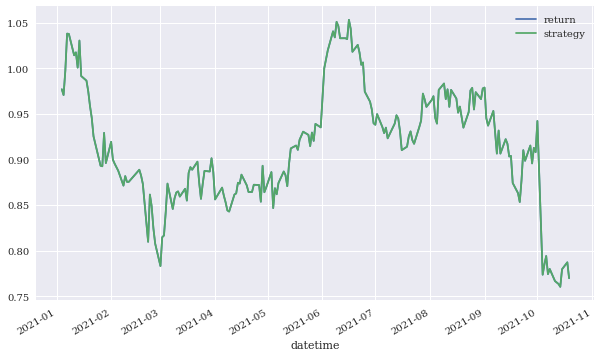

In [94]:
test_data[['return', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

Adding TA features

In [97]:
data['momentum'] = data['return'].rolling(5).mean().shift(1)
data['volatility'] = data['return'].rolling(20).std().shift(1)
data['distance'] = (data['close'] - data['close'].rolling(50).mean()).shift(1)

In [99]:
data.dropna(inplace=True)

In [100]:
data.round(4).tail()

,close,return,direction,lag_1,lag_2,lag_3,lag_4,lag_5,momentum,volatility,distance
datetime,,,,,,,,,,,
2021-10-13,24.15,-0.0041,0,24.25,24.67,24.49,25.12,24.83,-0.0018,0.0487,-4.8000
2021-10-14,24.05,-0.0041,0,24.15,24.25,24.67,24.49,25.12,-0.0056,0.0487,-4.7724
2021-10-15,24.66,0.0250,1,24.05,24.15,24.25,24.67,24.49,-0.0087,0.0487,-4.7402
2021-10-18,24.90,0.0097,1,24.66,24.05,24.15,24.25,24.67,0.0014,0.0492,-4.0252
2021-10-19,24.35,-0.0223,0,24.90,24.66,24.05,24.15,24.25,0.0019,0.0489,-3.6890


In [101]:
training_data = data[data.index < cutoff].copy()

In [102]:
mu, std = training_data.mean(), training_data.std()

In [103]:
training_data_ = (training_data - mu) / std

In [104]:
test_data = data[data.index >= cutoff].copy()

In [105]:
test_data_ = (test_data - mu) / std

In [106]:
set_seeds()
model = Sequential()
model.add(Dense(32, activation='relu',
input_shape=(len(cols),)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizer,
loss='binary_crossentropy',
metrics=['accuracy'])

In [107]:
%%time
model.fit(training_data_[cols], training_data['direction'], verbose=False, epochs=200)

CPU times: user 29.7 s, sys: 5.64 s, total: 35.4 s
Wall time: 22.9 s


In [108]:
model.evaluate(training_data_[cols], training_data['direction'])

83/83 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5288


[0.6900726556777954, 0.5288135409355164]

In [109]:
pred = np.where(model.predict(training_data_[cols]) > 0.5, 1, 0)

In [110]:
training_data['prediction'] = np.where(pred > 0, 1, -1)

In [111]:
training_data['strategy'] = (training_data['prediction'] * training_data['return'])

In [112]:
training_data[['return', 'strategy']].sum().apply(np.exp)

return      2.431207
strategy    5.620481
dtype: float64

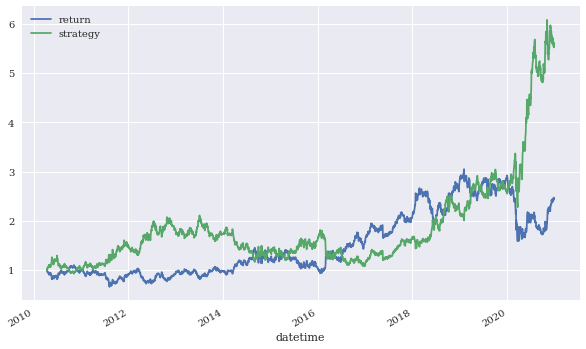

In [113]:
training_data[['return', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [114]:
model.evaluate(test_data_[cols], test_data['direction'])

7/7 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.5404


[0.6885702013969421, 0.5404040217399597]

In [115]:
pred = np.where(model.predict(test_data_[cols]) > 0.5, 1, 0)

In [116]:
test_data['prediction'] = np.where(pred > 0, 1, -1)

In [117]:
test_data['prediction'].value_counts()

 1    100
-1     98
Name: prediction, dtype: int64

In [118]:
test_data['strategy'] = (test_data['prediction'] * test_data['return'])

In [119]:
test_data[['return', 'strategy']].sum().apply(np.exp)

return      0.769839
strategy    1.800450
dtype: float64

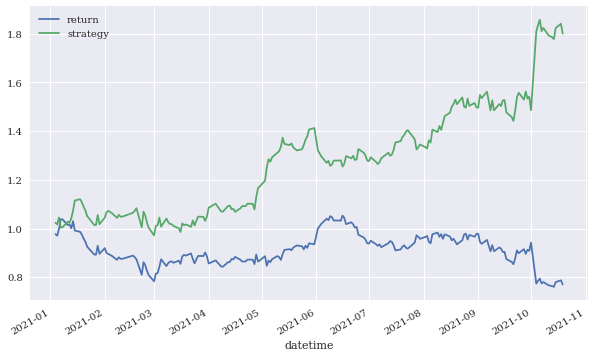

In [120]:
test_data[['return', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));